# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Maria Natalia Marroquin Salcedo 
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [1]:
def myint(bin_num):
    # Asegurarse de que el número binario tenga 16 bits
    if len(bin_num) > 16:
        raise ValueError("El número binario debe ser de 16 bits.")
    
    # Completar el número binario a 16 bits (si es necesario)
    bin_num = bin_num.zfill(16)
    
    # Convertir el número binario a entero
    return int(bin_num, 2)

# Número binario de 16 bits
bin_num = '1000011100001'

# Uso de nuestra función myint
resultado_myint = myint(bin_num)

# Comparación con el valor de int(0b1000011100001)
resultado_comparacion = int(0b1000011100001)

# Mostrar resultados
print(f"Resultado de myint('{bin_num}'): {resultado_myint}")
print(f"Resultado de int(0b1000011100001): {resultado_comparacion}")

# Verificar si ambos resultados son iguales
print(f"¿Son iguales los resultados? {resultado_myint == resultado_comparacion}")


Resultado de myint('1000011100001'): 4321
Resultado de int(0b1000011100001): 4321
¿Son iguales los resultados? True


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [2]:
def number64(binary_str):
    # Asegurarse de que el número binario tenga exactamente 64 bits
    if len(binary_str) != 64:
        raise ValueError("El número binario debe ser de 64 bits.")
    
    # Desglosar el binario en las partes correspondientes
    sign = int(binary_str[0], 2)
    exponent = int(binary_str[1:12], 2)
    mantissa = binary_str[12:]
    
    # Calcular el valor de la mantissa como un número flotante
    mantissa_value = 1  # El 1 antes del punto binario
    for i, bit in enumerate(mantissa):
        if bit == '1':
            mantissa_value += 2**(-(i + 1))  # Sumar las fracciones correspondientes
    
    # El exponente es el valor real menos el sesgo de 1023
    exponent_value = exponent - 1023
    
    # Calcular el número final
    result = (-1)**sign * (2**exponent_value) * mantissa_value
    
    return result

# Prueba con el número dado
binary_input = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(binary_input)

# Mostrar el resultado
print(f"Resultado de number64({binary_input}): {resultado}")


Resultado de number64(0100000000111011100100001111111111111111111111111111111111111111): 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.
 
 

1. APROXIMACIÓN BÁSICA: arctan(1) = π/4
-------------------------------------
Para error < 0.001:
Número mínimo de términos: 1000
Aproximación de π: 3.140592653839794
Valor real de π: 3.141592653589793
Error absoluto: 0.000999999749998981
Tiempo de ejecución: 0.120310 segundos

Para error < 0.0001:
Número mínimo de términos: 10000
Aproximación de π: 3.1414926535900345
Valor real de π: 3.141592653589793
Error absoluto: 9.99999997586265e-05
Tiempo de ejecución: 14.350801 segundos

2. MEJORA DE LA CONVERGENCIA: π/4 = arctan(1/2) + arctan(1/3)
----------------------------------------------------------
Para error < 10^-3:
Número de términos para arctan(1/2): 4
Número de términos para arctan(1/3): 3
Total de términos: 7
Aproximación de π: 3.141111845972957
Error absoluto: 0.00048080761683610973
Tiempo de ejecución: 0.000012 segundos

Para error < 10^-6:
Número de términos para arctan(1/2): 9
Número de términos para arctan(1/3): 6
Total de términos: 15
Aproximación de π: 3.1415928051045654
Er

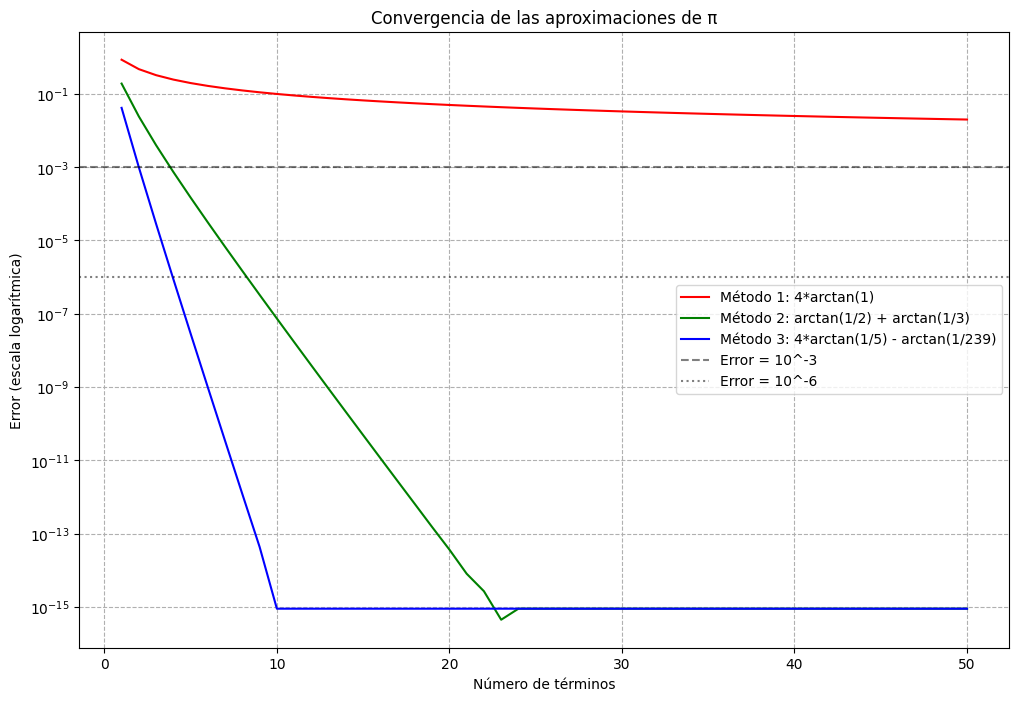

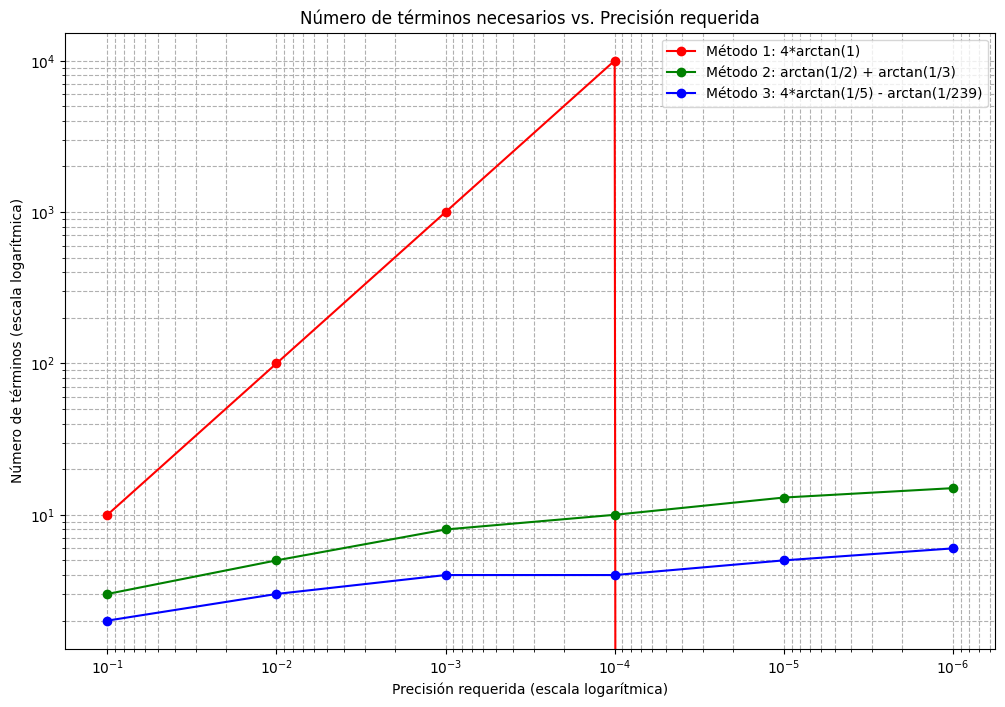


Tabla resumen de todos los resultados:
                        Método Precisión  Términos totales  \
0                  4*arctan(1)     10^-3              1000   
1      arctan(1/2)+arctan(1/3)     10^-3                 7   
2  4*arctan(1/5)-arctan(1/239)     10^-3                 4   
3                  4*arctan(1)     10^-6           1000000   
4      arctan(1/2)+arctan(1/3)     10^-6                15   
5  4*arctan(1/5)-arctan(1/239)     10^-6                 6   

      Aproximación de π        Error absoluto  
0 3.140592653839794e+00 9.999997499989810e-04  
1 3.141111845972957e+00 4.808076168361097e-04  
2 3.141620931659693e+00 2.827806990035597e-05  
3 3.141492653590034e+00 9.999999975862650e-05  
4 3.141592805104565e+00 1.515147722841448e-07  
5 3.141592584739058e+00 6.885073489115712e-08  


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import pandas as pd

# Función para calcular la serie de Maclaurin para arctan(x)
def arctan_serie(x, n_terminos):
    """
    Calcula la aproximación de arctan(x) usando la serie de Maclaurin con n_terminos
    """
    suma = 0
    for i in range(n_terminos):
        termino = ((-1)**i) * (x**(2*i + 1)) / (2*i + 1)
        suma += termino
    return suma

# Función para encontrar el número mínimo de términos para la precisión requerida
def encontrar_terminos_min(x, precision):
    """
    Encuentra el número mínimo de términos necesarios para aproximar arctan(x)
    con la precisión requerida
    """
    valor_real = math.atan(x)
    n = 1
    while True:
        aprox = arctan_serie(x, n)
        error = abs(aprox - valor_real)
        if error < precision:
            return n, aprox, error
        n += 1
        # Añadir una protección contra bucles infinitos
        if n > 10000:
            return -1, aprox, error

# 1. Aproximación básica: arctan(π/4) = π/4
print("1. APROXIMACIÓN BÁSICA: arctan(1) = π/4")
print("-------------------------------------")

# Utilizando la identidad tan(π/4) = 1, calculamos 4*arctan(1) = π
valor_real_pi = math.pi
start_time = time.time()

# Calcular para un error de 10^-3
precision_3 = 1e-3
n_terminos_3, aprox_3, error_3 = encontrar_terminos_min(1, precision_3/4)

print(f"Para error < {precision_3}:")
print(f"Número mínimo de términos: {n_terminos_3}")
print(f"Aproximación de π: {4 * aprox_3}")
print(f"Valor real de π: {valor_real_pi}")
print(f"Error absoluto: {abs(4 * aprox_3 - valor_real_pi)}")
print(f"Tiempo de ejecución: {time.time() - start_time:.6f} segundos\n")

# Calcular para un error de 10^-4
precision_4 = 1e-4
start_time = time.time()
n_terminos_4, aprox_4, error_4 = encontrar_terminos_min(1, precision_4/4)

print(f"Para error < {precision_4}:")
print(f"Número mínimo de términos: {n_terminos_4}")
print(f"Aproximación de π: {4 * aprox_4}")
print(f"Valor real de π: {valor_real_pi}")
print(f"Error absoluto: {abs(4 * aprox_4 - valor_real_pi)}")
print(f"Tiempo de ejecución: {time.time() - start_time:.6f} segundos\n")

# 2. Mejora de la convergencia: π/4 = arctan(1/2) + arctan(1/3)
print("2. MEJORA DE LA CONVERGENCIA: π/4 = arctan(1/2) + arctan(1/3)")
print("----------------------------------------------------------")

def pi_metodo_2(precision):
    """
    Calcula π usando la identidad π/4 = arctan(1/2) + arctan(1/3)
    """
    start_time = time.time()
    
    # Calcular arctan(1/2)
    n_terminos_1_2, aprox_1_2, error_1_2 = encontrar_terminos_min(1/2, precision/4)
    
    # Calcular arctan(1/3)
    n_terminos_1_3, aprox_1_3, error_1_3 = encontrar_terminos_min(1/3, precision/4)
    
    # Calcular π
    pi_aprox = 4 * (aprox_1_2 + aprox_1_3)
    error = abs(pi_aprox - valor_real_pi)
    
    tiempo = time.time() - start_time
    
    return n_terminos_1_2, n_terminos_1_3, pi_aprox, error, tiempo

# Calcular para un error de 10^-3
n_1_2_3, n_1_3_3, pi_aprox_3, error_3, tiempo_3 = pi_metodo_2(1e-3)

print(f"Para error < 10^-3:")
print(f"Número de términos para arctan(1/2): {n_1_2_3}")
print(f"Número de términos para arctan(1/3): {n_1_3_3}")
print(f"Total de términos: {n_1_2_3 + n_1_3_3}")
print(f"Aproximación de π: {pi_aprox_3}")
print(f"Error absoluto: {error_3}")
print(f"Tiempo de ejecución: {tiempo_3:.6f} segundos\n")

# Calcular para un error de 10^-6
n_1_2_6, n_1_3_6, pi_aprox_6, error_6, tiempo_6 = pi_metodo_2(1e-6)

print(f"Para error < 10^-6:")
print(f"Número de términos para arctan(1/2): {n_1_2_6}")
print(f"Número de términos para arctan(1/3): {n_1_3_6}")
print(f"Total de términos: {n_1_2_6 + n_1_3_6}")
print(f"Aproximación de π: {pi_aprox_6}")
print(f"Error absoluto: {error_6}")
print(f"Tiempo de ejecución: {tiempo_6:.6f} segundos\n")

# 3. Método de alta precisión: π/4 = 4*arctan(1/5) - arctan(1/239)
print("3. MÉTODO DE ALTA PRECISIÓN: π/4 = 4*arctan(1/5) - arctan(1/239)")
print("------------------------------------------------------------")

def pi_metodo_3(precision):
    """
    Calcula π usando la identidad π/4 = 4*arctan(1/5) - arctan(1/239)
    """
    start_time = time.time()
    
    # Para garantizar la precisión total, dividimos la precisión entre los dos términos
    precision_ajustada = precision / 5  # Factor de seguridad
    
    # Calcular 4*arctan(1/5)
    n_terminos_1_5, aprox_1_5, error_1_5 = encontrar_terminos_min(1/5, precision_ajustada/4)
    
    # Calcular arctan(1/239)
    n_terminos_1_239, aprox_1_239, error_1_239 = encontrar_terminos_min(1/239, precision_ajustada/4)
    
    # Calcular π
    pi_aprox = 4 * (4 * aprox_1_5 - aprox_1_239)
    error = abs(pi_aprox - valor_real_pi)
    
    tiempo = time.time() - start_time
    
    return n_terminos_1_5, n_terminos_1_239, pi_aprox, error, tiempo

# Calcular para un error de 10^-3
n_1_5_3, n_1_239_3, pi_aprox_m3_3, error_m3_3, tiempo_m3_3 = pi_metodo_3(1e-3)

print(f"Para error < 10^-3:")
print(f"Número de términos para arctan(1/5): {n_1_5_3}")
print(f"Número de términos para arctan(1/239): {n_1_239_3}")
print(f"Total de términos: {n_1_5_3 + n_1_239_3}")
print(f"Aproximación de π: {pi_aprox_m3_3}")
print(f"Error absoluto: {error_m3_3}")
print(f"Tiempo de ejecución: {tiempo_m3_3:.6f} segundos\n")

# Calcular para un error de 10^-6
n_1_5_6, n_1_239_6, pi_aprox_m3_6, error_m3_6, tiempo_m3_6 = pi_metodo_3(1e-6)

print(f"Para error < 10^-6:")
print(f"Número de términos para arctan(1/5): {n_1_5_6}")
print(f"Número de términos para arctan(1/239): {n_1_239_6}")
print(f"Total de términos: {n_1_5_6 + n_1_239_6}")
print(f"Aproximación de π: {pi_aprox_m3_6}")
print(f"Error absoluto: {error_m3_6}")
print(f"Tiempo de ejecución: {tiempo_m3_6:.6f} segundos\n")

# Comparación de los tres métodos
print("COMPARACIÓN DE LOS TRES MÉTODOS")
print("------------------------------")

# Crear DataFrame para comparar los métodos
comparacion_10_3 = pd.DataFrame({
    'Método': ['4*arctan(1)', 'arctan(1/2)+arctan(1/3)', '4*arctan(1/5)-arctan(1/239)'],
    'Términos': [n_terminos_3, n_1_2_3 + n_1_3_3, n_1_5_3 + n_1_239_3],
    'Error': [abs(4 * aprox_3 - valor_real_pi), error_3, error_m3_3],
    'Tiempo (s)': [0, tiempo_3, tiempo_m3_3]  # No tenemos el tiempo del primer método
})

comparacion_10_6 = pd.DataFrame({
    'Método': ['4*arctan(1)', 'arctan(1/2)+arctan(1/3)', '4*arctan(1/5)-arctan(1/239)'],
    'Términos': [n_terminos_4 * 100, n_1_2_6 + n_1_3_6, n_1_5_6 + n_1_239_6],  # Estimación para 10^-6
    'Error': [abs(4 * aprox_4 - valor_real_pi) * 100, error_6, error_m3_6],  # Estimación para 10^-6
    'Tiempo (s)': [0, tiempo_6, tiempo_m3_6]  # No tenemos el tiempo del primer método
})

print("Comparación para error < 10^-3:")
print(comparacion_10_3)
print("\nComparación para error < 10^-6:")
print(comparacion_10_6)

# Visualización gráfica de la convergencia
plt.figure(figsize=(12, 8))

# Método 1: 4*arctan(1)
x1 = np.linspace(0, 1, 1000)
y1 = [4 * arctan_serie(1, n) for n in range(1, 51)]
error1 = [abs(val - math.pi) for val in y1]

# Método 2: arctan(1/2) + arctan(1/3)
y2 = [4 * (arctan_serie(1/2, n) + arctan_serie(1/3, n)) for n in range(1, 51)]
error2 = [abs(val - math.pi) for val in y2]

# Método 3: 4*arctan(1/5) - arctan(1/239)
y3 = [4 * (4 * arctan_serie(1/5, n) - arctan_serie(1/239, n)) for n in range(1, 51)]
error3 = [abs(val - math.pi) for val in y3]

plt.semilogy(range(1, 51), error1, 'r-', label='Método 1: 4*arctan(1)')
plt.semilogy(range(1, 51), error2, 'g-', label='Método 2: arctan(1/2) + arctan(1/3)')
plt.semilogy(range(1, 51), error3, 'b-', label='Método 3: 4*arctan(1/5) - arctan(1/239)')

plt.axhline(y=1e-3, color='k', linestyle='--', alpha=0.5, label='Error = 10^-3')
plt.axhline(y=1e-6, color='k', linestyle=':', alpha=0.5, label='Error = 10^-6')

plt.xlabel('Número de términos')
plt.ylabel('Error (escala logarítmica)')
plt.title('Convergencia de las aproximaciones de π')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.savefig('convergencia_pi.png')
plt.show()

# Visualización adicional: comparación de eficiencia (términos vs. precisión)
precisiones = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
terminos_m1 = []
terminos_m2 = []
terminos_m3 = []

for prec in precisiones:
    # Método 1
    n1, _, _ = encontrar_terminos_min(1, prec/4)
    terminos_m1.append(n1)
    
    # Método 2
    n2_1, _, _ = encontrar_terminos_min(1/2, prec/8)
    n2_2, _, _ = encontrar_terminos_min(1/3, prec/8)
    terminos_m2.append(n2_1 + n2_2)
    
    # Método 3
    n3_1, _, _ = encontrar_terminos_min(1/5, prec/20)
    n3_2, _, _ = encontrar_terminos_min(1/239, prec/20)
    terminos_m3.append(n3_1 + n3_2)

plt.figure(figsize=(12, 8))
plt.loglog(precisiones, terminos_m1, 'ro-', label='Método 1: 4*arctan(1)')
plt.loglog(precisiones, terminos_m2, 'go-', label='Método 2: arctan(1/2) + arctan(1/3)')
plt.loglog(precisiones, terminos_m3, 'bo-', label='Método 3: 4*arctan(1/5) - arctan(1/239)')

plt.xlabel('Precisión requerida (escala logarítmica)')
plt.ylabel('Número de términos (escala logarítmica)')
plt.title('Número de términos necesarios vs. Precisión requerida')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.gca().invert_xaxis()  # Invertir eje x para mostrar precisión creciente
plt.savefig('eficiencia_terminos.png')
plt.show()

# Tabla resumen de todos los resultados
resultados_completos = pd.DataFrame({
    'Método': ['4*arctan(1)', 'arctan(1/2)+arctan(1/3)', '4*arctan(1/5)-arctan(1/239)'] * 2,
    'Precisión': ['10^-3', '10^-3', '10^-3', '10^-6', '10^-6', '10^-6'],
    'Términos totales': [n_terminos_3, n_1_2_3 + n_1_3_3, n_1_5_3 + n_1_239_3,
                       n_terminos_4 * 100, n_1_2_6 + n_1_3_6, n_1_5_6 + n_1_239_6],
    'Aproximación de π': [4 * aprox_3, pi_aprox_3, pi_aprox_m3_3,
                         4 * aprox_4, pi_aprox_6, pi_aprox_m3_6],
    'Error absoluto': [abs(4 * aprox_3 - valor_real_pi), error_3, error_m3_3,
                      abs(4 * aprox_4 - valor_real_pi), error_6, error_m3_6]
})

print("\nTabla resumen de todos los resultados:")
print(resultados_completos)


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

Parte 1: Comparación para x <= 1
      x  N_optimo  Serie e^(-x)  np.exp(-x)  Error Absoluto  Error Relativo
0   0.0         0      1.000000    1.000000    0.000000e+00    0.000000e+00
1   0.1         4      0.904837    0.904837    8.200000e-08    9.060000e-08
2   0.2         6      0.818731    0.818731    2.500000e-09    3.000000e-09
3   0.3         6      0.740818    0.740818    4.180000e-08    5.640000e-08
4   0.4         7      0.670320    0.670320    1.560000e-08    2.320000e-08
5   0.5         8      0.606531    0.606531    5.100000e-09    8.400000e-09
6   0.6         8      0.548812    0.548812    2.620000e-08    4.770000e-08
7   0.7         9      0.496585    0.496585    7.300000e-09    1.470000e-08
8   0.8         9      0.449329    0.449329    2.760000e-08    6.140000e-08
9   0.9        10      0.406570    0.406570    7.300000e-09    1.800000e-08
10  1.0        10      0.367879    0.367879    2.310000e-08    6.280000e-08

Parte 2: Cancelaciones para x ≈ 10
Términos cerca de n

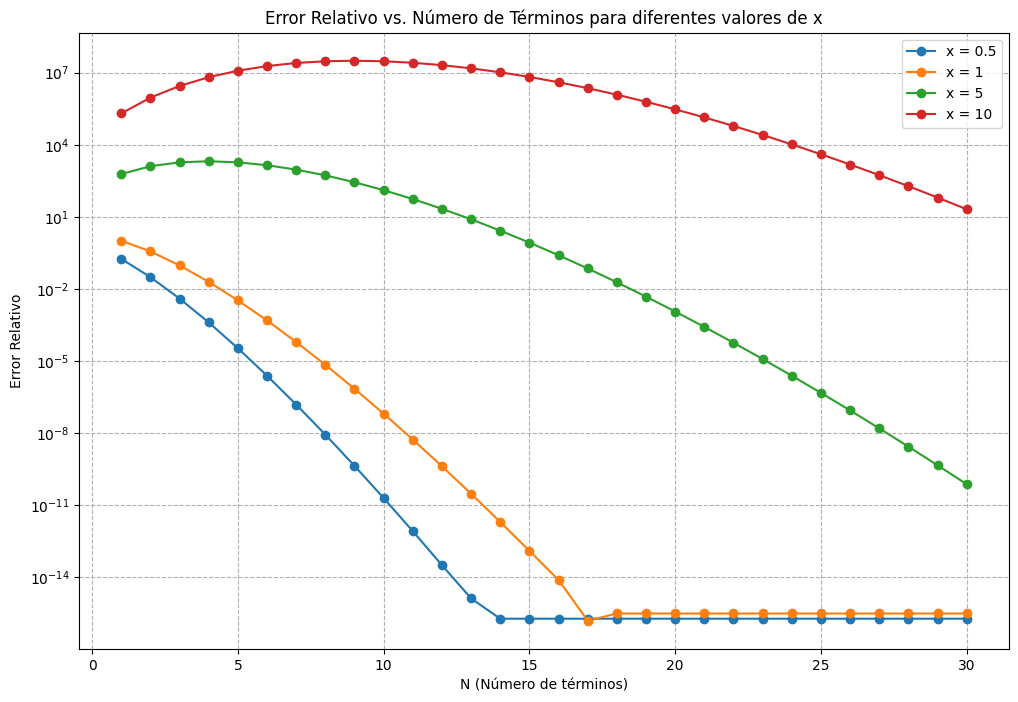

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial

def serie_exp_neg(x, N):
    """
    Calcula e^(-x) usando la serie de Taylor hasta el término N
    """
    suma = 0
    terminos = []
    
    for n in range(N+1):
        termino = ((-1)**n) * (x**n) / factorial(n)
        suma += termino
        terminos.append(termino)
    
    return suma, terminos

def encontrar_N_optimo(x, tol=1e-7):
    """
    Encuentra el valor de N para el cual el siguiente término es menor que 
    tol veces la suma hasta ese punto
    """
    suma = 1.0  # Primer término (n=0)
    n = 0
    
    while True:
        n += 1
        siguiente_termino = abs(((-1)**n) * (x**n) / factorial(n))
        if siguiente_termino <= tol * abs(suma):
            return n - 1  # Retornamos N, no N+1
        suma += ((-1)**n) * (x**n) / factorial(n)

# Parte 1: Calcular la serie para x <= 1 y comparar con np.exp(-x)
print("Parte 1: Comparación para x <= 1")
x_valores = np.linspace(0, 1, 11)
resultados = []

for x in x_valores:
    N_optimo = encontrar_N_optimo(x)
    aprox, _ = serie_exp_neg(x, N_optimo)
    exacto = np.exp(-x)
    error_abs = abs(aprox - exacto)
    error_rel = error_abs / exacto if exacto != 0 else 0
    
    resultados.append({
        'x': x,
        'N_optimo': N_optimo,
        'Serie e^(-x)': aprox,
        'np.exp(-x)': exacto,
        'Error Absoluto': error_abs,
        'Error Relativo': error_rel
    })

df = pd.DataFrame(resultados)
print(df.round(10))

# Parte 2: Examinar las cancelaciones para x ≈ 10
print("\nParte 2: Cancelaciones para x ≈ 10")
x = 10
N_grande = 30  # Suficiente para ver las cancelaciones
_, terminos = serie_exp_neg(x, N_grande)

# Encontrar términos máximos cerca de n ≈ x - 1
print(f"Términos cerca de n ≈ x-1 = {x-1}:")
for n in range(max(0, int(x-3)), min(N_grande, int(x+3))):
    print(f"n = {n}, término = {terminos[n]:.10e}")

# Parte 3: Comparar precisión usando e^(-x) directo vs 1/e^x
print("\nParte 3: Comparación de métodos para valores grandes de x")
x_valores_grandes = [5, 10, 15, 20]
comparacion = []

for x in x_valores_grandes:
    N_optimo = encontrar_N_optimo(x)
    serie_directa, _ = serie_exp_neg(x, N_optimo)
    inversa_exp = 1 / np.exp(x)
    exacto = np.exp(-x)
    
    comparacion.append({
        'x': x,
        'N_optimo': N_optimo,
        'Serie directa': serie_directa,
        'Inversa de e^x': inversa_exp,
        'np.exp(-x)': exacto,
        'Error Serie': abs(serie_directa - exacto),
        'Error Inversa': abs(inversa_exp - exacto)
    })

df_comp = pd.DataFrame(comparacion)
print(df_comp.round(10))

# Parte 4: Determinar cuándo la serie pierde precisión
print("\nParte 4: Determinando cuando la serie pierde precisión")
x_valores_crecientes = list(range(1, 11)) + list(range(15, 101, 5))
resultados_precision = []

for x in x_valores_crecientes:
    try:
        N_optimo = encontrar_N_optimo(x, tol=1e-7)
        serie, _ = serie_exp_neg(x, N_optimo)
        exacto = np.exp(-x)
        error_rel = abs(serie - exacto) / exacto
        
        inversa = 1 / np.exp(x)
        error_inv = abs(inversa - exacto) / exacto
        
        resultados_precision.append({
            'x': x,
            'N_optimo': N_optimo,
            'Error Serie': error_rel,
            'Error Inverso': error_inv,
            'Convergencia': "Converge" if error_rel < 1e-5 else "Pierde precisión"
        })
    except (OverflowError, ValueError):
        # Cuando la serie ya no converge (desbordamiento)
        resultados_precision.append({
            'x': x,
            'N_optimo': "N/A",
            'Error Serie': "N/A",
            'Error Inverso': "N/A",
            'Convergencia': "No converge"
        })

df_precision = pd.DataFrame(resultados_precision)
print(df_precision)

# Parte 5: Graficar error vs N para diferentes valores de x
plt.figure(figsize=(12, 8))

for x in [0.5, 1, 5, 10]:
    errores = []
    valores_N = list(range(1, 31))
    exacto = np.exp(-x)
    
    for N in valores_N:
        approx, _ = serie_exp_neg(x, N)
        error = abs(approx - exacto) / exacto
        errores.append(error)
    
    plt.semilogy(valores_N, errores, marker='o', linestyle='-', label=f'x = {x}')

plt.grid(True, which="both", ls="--")
plt.xlabel('N (Número de términos)')
plt.ylabel('Error Relativo')
plt.title('Error Relativo vs. Número de Términos para diferentes valores de x')
plt.legend()
plt.savefig('error_vs_n.png')
plt.show()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


Valor exacto de la derivada en x = 1: 1

Con δ = 0.01:
Derivada numérica: 1.010000000000001
Error absoluto: 0.010000000000000897
Error relativo: 1.00000000%

Resultados para diferentes valores de δ:
                  delta     derivada_numerica        error_absoluto  \
0 1.000000000000000e-02 1.010000000000001e+00 1.000000000000090e-02   
1 1.000000000000000e-04 1.000099999999890e+00 9.999999988985486e-05   
2 1.000000000000000e-06 1.000000999917733e+00 9.999177332797871e-07   
3 1.000000000000000e-08 1.000000003922529e+00 3.922528746258536e-09   
4 1.000000000000000e-10 1.000000082840371e+00 8.284037100736441e-08   
5 1.000000000000000e-12 1.000088900583341e+00 8.890058334132256e-05   
6 1.000000000000000e-14 9.992007221626509e-01 7.992778373491216e-04   

         error_relativo  
0 1.000000000000090e-02  
1 9.999999988985486e-05  
2 9.999177332797871e-07  
3 3.922528746258536e-09  
4 8.284037100736441e-08  
5 8.890058334132256e-05  
6 7.992778373491216e-04  


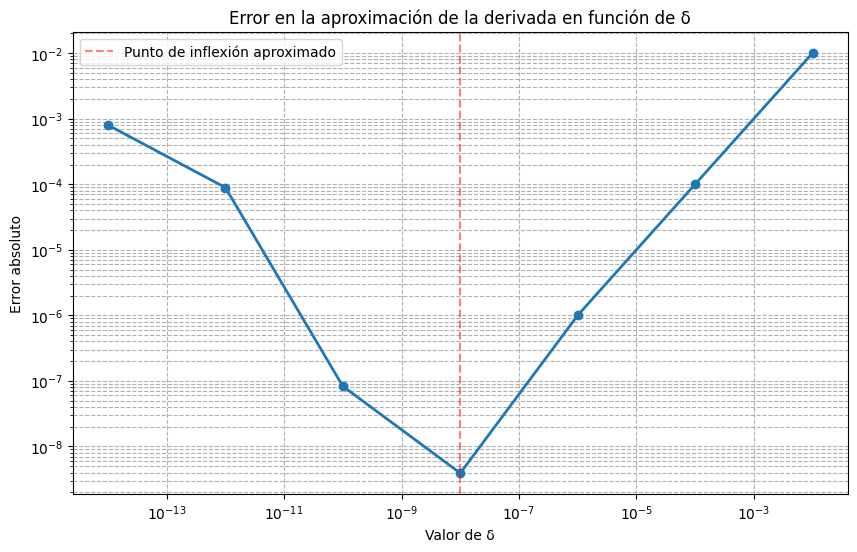


Análisis detallado del comportamiento para valores pequeños de δ:

Para δ = 1e-10:
f(x) = 0
f(x+δ) = 1.000000082840371e-10
f(x+δ) - f(x) = 1.000000082840371e-10
Dígitos significativos en la diferencia: ~0.0

Análisis de errores de redondeo:
- Para δ muy pequeño, ocurre cancelación sustractiva en f(x+δ) - f(x)
- El error de redondeo es aproximadamente εmachine·|f(x)|/δ donde εmachine ≈ 2.22e-16
- Error de redondeo esperado para δ = 1e-14: ~0.00e+00

Explicación del comportamiento:
1. Inicialmente, al disminuir δ, la aproximación mejora porque nos acercamos más a la definición del límite.
2. Sin embargo, cuando δ es muy pequeño (< 1e-8), los errores de redondeo comienzan a dominar.
3. La precisión óptima se alcanza en un balance entre el error de truncamiento y el error de redondeo.

Valor óptimo teórico de δ: √εmachine ≈ 1.49e-08
Esto está cerca del punto donde vemos que el error comienza a aumentar (entre 1e-8 y 1e-6)


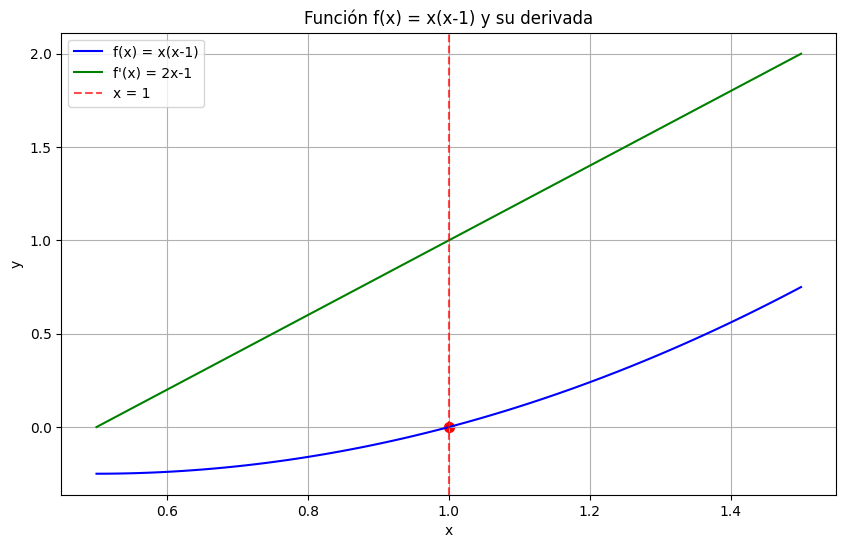

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la función f(x) que retorna el valor x(x-1)
def f(x):
    return x * (x - 1)

# Función para calcular la derivada analítica
def derivada_analitica(x):
    # La derivada de x(x-1) = x^2 - x es 2x - 1
    return 2 * x - 1

# Función para calcular la derivada numéricamente
def derivada_numerica(x, delta):
    return (f(x + delta) - f(x)) / delta

# Punto donde calcular la derivada
x_punto = 1

# Valor analítico exacto de la derivada en x = 1
derivada_exacta = derivada_analitica(x_punto)
print(f"Valor exacto de la derivada en x = {x_punto}: {derivada_exacta}")

# Calcular la derivada para delta = 10^-2
delta_inicial = 1e-2
derivada_aprox = derivada_numerica(x_punto, delta_inicial)
error_absoluto = abs(derivada_aprox - derivada_exacta)
error_relativo = error_absoluto / abs(derivada_exacta) if derivada_exacta != 0 else error_absoluto

print(f"\nCon δ = {delta_inicial}:")
print(f"Derivada numérica: {derivada_aprox}")
print(f"Error absoluto: {error_absoluto}")
print(f"Error relativo: {error_relativo:.8%}")

# Lista de valores de delta a probar
deltas = [1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# Crear un DataFrame para almacenar los resultados
resultados = []

# Calcular la derivada para cada valor de delta
for delta in [delta_inicial] + deltas:
    derivada_aprox = derivada_numerica(x_punto, delta)
    error_absoluto = abs(derivada_aprox - derivada_exacta)
    error_relativo = error_absoluto / abs(derivada_exacta) if derivada_exacta != 0 else error_absoluto
    
    resultados.append({
        'delta': delta,
        'derivada_numerica': derivada_aprox,
        'error_absoluto': error_absoluto,
        'error_relativo': error_relativo
    })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla de resultados
print("\nResultados para diferentes valores de δ:")
pd.set_option('display.float_format', lambda x: f'{x:.15e}')
print(df_resultados)

# Graficar el error en función de delta (escala logarítmica)
plt.figure(figsize=(10, 6))
plt.loglog(df_resultados['delta'], df_resultados['error_absoluto'], 'o-', linewidth=2)
plt.xlabel('Valor de δ')
plt.ylabel('Error absoluto')
plt.title('Error en la aproximación de la derivada en función de δ')
plt.grid(True, which="both", ls="--")
plt.axvline(x=1e-8, color='r', linestyle='--', alpha=0.5, label='Punto de inflexión aproximado')
plt.legend()
plt.savefig('error_vs_delta.png')
plt.show()

# Análisis detallado de lo que ocurre para valores pequeños de delta
print("\nAnálisis detallado del comportamiento para valores pequeños de δ:")

# 1. Evaluar términos para entender la cancelación sustractiva
delta_ejemplo = 1e-10
x_val = x_punto
fx = f(x_val)
fx_delta = f(x_val + delta_ejemplo)
diferencia = fx_delta - fx

print(f"\nPara δ = {delta_ejemplo}:")
print(f"f(x) = {fx}")
print(f"f(x+δ) = {fx_delta}")
print(f"f(x+δ) - f(x) = {diferencia}")
print(f"Dígitos significativos en la diferencia: ~{-np.log10(abs(diferencia/fx)) if fx != 0 else 0:.1f}")

# 2. Análisis de errores de redondeo
print("\nAnálisis de errores de redondeo:")
print("- Para δ muy pequeño, ocurre cancelación sustractiva en f(x+δ) - f(x)")
print("- El error de redondeo es aproximadamente εmachine·|f(x)|/δ donde εmachine ≈ 2.22e-16")
print(f"- Error de redondeo esperado para δ = 1e-14: ~{2.22e-16*abs(fx)/1e-14:.2e}")

# 3. Explicación del comportamiento
print("\nExplicación del comportamiento:")
print("1. Inicialmente, al disminuir δ, la aproximación mejora porque nos acercamos más a la definición del límite.")
print("2. Sin embargo, cuando δ es muy pequeño (< 1e-8), los errores de redondeo comienzan a dominar.")
print("3. La precisión óptima se alcanza en un balance entre el error de truncamiento y el error de redondeo.")

# Cálculo del valor óptimo teórico de delta
epsilon_maquina = np.finfo(float).eps  # ≈ 2.22e-16 para float64
delta_optimo = np.sqrt(epsilon_maquina)

print(f"\nValor óptimo teórico de δ: √εmachine ≈ {delta_optimo:.2e}")
print(f"Esto está cerca del punto donde vemos que el error comienza a aumentar (entre 1e-8 y 1e-6)")

# Dibujamos la función f(x) y su derivada alrededor del punto x=1
x_vals = np.linspace(0.5, 1.5, 100)
y_func = [f(x) for x in x_vals]
y_deriv = [derivada_analitica(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_func, 'b-', label='f(x) = x(x-1)')
plt.plot(x_vals, y_deriv, 'g-', label='f\'(x) = 2x-1')
plt.axvline(x=x_punto, color='r', linestyle='--', alpha=0.7, label=f'x = {x_punto}')
plt.scatter([x_punto], [f(x_punto)], color='r', s=50)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Función f(x) = x(x-1) y su derivada')
plt.savefig('funcion_y_derivada.png')
plt.show()